# The Olympics Glory: Analysing the Top Gold-Winning Team

| GROUP                 | 1 |
| --------------------- | ----------------------- |
| Level                 | 7 (Postgraduate)        |
| Course name           | MSc Business Analytics  |
| Module code           | MN5813                  |
| Module tutor          | Alex Reppel             |
| Assignment number     | 1 _(Group assignment)_  |
| Assignment title      | The Olympics Glory: Analysing the Top Gold-Winning Team  |

| Candidate numbers                  |
| ------------------------------------ |
| 2510234 |
| 2505080 |
| 2511583 |

## Project summary / Literature review

This project is based on the Olympics data which consists of two datasets that have been merged into one. There are a number of ways to analyse this dataset. There are research papers that have done analysis based on medal tallies, country-wise performance and athlete specific achievements (Narute, n.d.), performance of a country over the years (Pradhan, Agrawal, and Nag, 2021), analysis of Olympic Medallists over the years (Sagala, and Aryatama, 2022), and predicting a country’s success at the summer Olympic games (Condon, Golden, and Wasil, 1999). This project focuses on conducting Exploratory Data Analysis (EDA) of the top countries based on Gold medals by using various visualisations. EDA assists in hypothesis generation by interpreting the data mostly through visuals or graphs. (Data, Komorowski, Marshall, Salciccioli, and Crutain, 2016). Hence, this project provides results based on the country with most Gold medals which will help readers to identify the reasons for the country’s success.

## Generative AI

Generative AI has been used in this project only to examine the functions of Python that can best help in reaching the project goals.

## Introduction

Various actions such as data cleaning, data wrangling, data analysis, and data visualisation have been performed on Python by importing pandas, and other necessary libraries.

Winning a gold medal at the Olympics, the largest sporting event is a dream of all athletes and their supporters. It is the highest sporting honour received by them and their country. The International Olympic Committee (IOC) also ranks countries by showing medals won by athletes in each country (Sergevev, 2015). This is the reason the aim of this project focuses on analysing the data related to the team that has won the most gold medals.

To achieve this aim, the first objective is to identify which is the most successful team in the history of the Olympics.

Second, to interpret what is the relation between the top team and the teams ranked after and why the first team is ranked higher. 

Third, the data of the top team and the two teams ranked after will be compared to find more reasons for the first team to be ranked high. This also gives an idea of how many medals were won by these teams throughout the years, if their win percentage has dropped or risen, which age group is more successful for a particular country, and the participation of the country throughout the years. 

All these elements are taken into account for understanding the success of the top team. 


## Setup

### Steps to run this Notebook

This notebook is available in a public repository which can be reached through the following link: https://github.com/RahulB-4/Group-Project.git
Download the file named "group-1-project" from the repository.

Next, the dataset used for analysis must be downloaded from kaggle. 
Dataset link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

After downloading the dataset, all the following files must be placed in one folder:-
1. group-1-project.ipynb
2. athlete_events.csv
3. noc_regions.csv

Once the file is run, the following outputs will be visible in the folder:-
1. df_merge_cleaned.csv
2. df_2_cleaned.csv
3. df_3_cleaned.csv
4. Three images in png format showcasing the visualisations.

### Import necessary libraries

In [447]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np

### Load data

In [449]:
data_source = "https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"

In [450]:
#Reading the 2 datasets as csv files.
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

### Convert into DataFrame

In [452]:
#Merging the 2 datasets based on "NOC" as it is the common column. 
#Performing "left" merge so that all the rows from the left dataset (athlete_events) is maintained, while only the matching values from the right dataset is shown. 
#.head() shows the first 5 rows of the merged dataframe.
df_merge = pd.merge(athlete_events, noc_regions, on = "NOC", how = "left")
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [453]:
#.info() is used to check the basic information (type) of each column.
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


## Data management

### Data cleaning

In [456]:
#.rename() is used to rename region and notes into Region and Notes respectively.
#.columns lists the column names to make sure the .rename() worked.
df_merge.rename(columns = {"region": "Region", "notes": "Notes"}, inplace = True)
df_merge.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

#### Handling missing values

In [458]:
#Checking if there are any missing values and give the sum of missing values in each column.
df_merge.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [459]:
#Dropping any duplicate entries.
df_merge = df_merge.drop_duplicates()

In [460]:
#.fillna() is used to fill missing vaues. In this case, missing values of "Medal" column will be filled with "None", stating no medals won.
df_merge["Medal"] = df_merge["Medal"].fillna("None")
df_merge["Medal"]

0         None
1         None
2         None
3         Gold
4         None
          ... 
271111    None
271112    None
271113    None
271114    None
271115    None
Name: Medal, Length: 269731, dtype: object

In [461]:
#Missing values of "Region" are filled with the corresponding "Team" values.
df_merge["Region"] = df_merge["Region"].fillna(df_merge["Team"])
df_merge["Region"]

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
271111         Poland
271112         Poland
271113         Poland
271114         Poland
271115         Poland
Name: Region, Length: 269731, dtype: object

In [462]:
#.str.lstrip("123.-") removes any special characters before the name.
df_merge["Region"] = df_merge["Region"].str.rstrip("123.-")
df_merge["Region"] = df_merge["Region"].str.lstrip("123.-")

Since there are teams with names such as "Japan-1" and "China-1", .str.rstrip("123.-") removes all the special characters after the name. So "Japan-1" will now be shown as "Japan" under the "Region" column.

In [464]:
#Here, .groupby() groups the data based on the "Year", "Event" and "Sex" columns.
#.transform("mean") applies the mean value (In this case, mean "Age" value) while keeping the original dataframe shape.
#This grouped mean value then replaces the missing age values by using .fillna().
avg_age = df_merge.groupby(["Year", "Event", "Sex"])["Age"].transform("mean")
df_merge["Age"] = df_merge["Age"].fillna(avg_age)

The reason for grouping these three columns is because for few events like "Gymnastics", there are more women than men in the recent olympics.
They are also quite younger than male gymnasts (Atiković, Kalinski, and Čuk, 2017).

In [466]:
#If there is not enough evidence for mean values to be generated based on the grouped columns, those values will not be generated. So now the grouped columns must be altered.
avg_age = df_merge.groupby(["Team", "Sport"])["Age"].transform("mean")
df_merge["Age"] = df_merge["Age"].fillna(avg_age)

"Team" and "Sport" have been considered for mean age as in 2004, 2008 and 2012,
the combined mean age of athletes from teams like Australia and Spain was 27.1, 
but more than half of their athletes competed as juniors(<=19 years) (O’Neill, Cotton, Cuadros, and O’Connor, 2016).

In [468]:
#But there are still missing values, so:-
avg_age = df_merge.groupby(["Region", "Sex"])["Age"].transform("mean")
df_merge["Age"] = df_merge["Age"].fillna(avg_age)
df_merge["Age"]

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 269731, dtype: float64

Unlike men, women have significant difference in their age especially from 2004 to 2016 (Atiković, Kalinski, and Čuk, 2017).
Hence regions with more women athletes such as USA and China must show a higher mean value for their age.

In [470]:
#Now the same is done to fill the missing "Height" values.
avg_height = df_merge.groupby(["Event", "Region", "Sex"])["Height"].transform("mean")
df_merge["Height"] = df_merge["Height"].fillna(avg_height)

Female participants from certain regions such as USA have always been small but are recently getting larger. 
Whereas for other events such as Basketball and Swimming, they have always been tall (Sands, Murray, McNeal, Slater, and Stone, 2018). 
Hence the data is grouped by "Event", "Region" and "Sex".

In [472]:
#Altering the grouped columns:-
avg_height = df_merge.groupby(["Year", "Region"])["Height"].transform("mean")
df_merge["Height"] = df_merge["Height"].fillna(avg_height)

Athletes from Rome in 1960 Olympics were much taller than the previous ones (Khosla, 1968), so we can aslo group the data by "Year" and "Region".

In [474]:
#But there are still missing "Height" values so:-
avg_height = df_merge.groupby(["Sport", "Year", "Sex"])["Height"].transform("mean")
df_merge["Height"] = df_merge["Height"].fillna(avg_height)
df_merge["Height"]

0         180.000000
1         170.000000
2         182.212766
3         181.912500
4         185.000000
             ...    
271111    179.000000
271112    176.000000
271113    176.000000
271114    185.000000
271115    185.000000
Name: Height, Length: 269731, dtype: float64

As mentioned earlier, USA female gymnasts in particular have been growing in height in the past few Olympics (Sands, Murray, McNeal, Slater, and Stone, 2018),
hence the data has been grouped by "Sport", "Year" and "Sex".

In [476]:
#Filling the missing "Weight" values.
avg_weight = df_merge.groupby(["Height", "Sex", "Event"])["Weight"].transform("mean")
df_merge["Weight"] = df_merge["Weight"].fillna(avg_weight)

Filling missing "Weight" values based on "Height", "Sex" and "Event" as in events such as Shot Put and Discus Throw, athletes are more tall and bulk. 
Also, male athletes' weigh heavier than female athletes in these sports (Khosla, 1968).

In [478]:
#Altering the grouped columns by including "Sport", "Team" and "Year":-
avg_weight = df_merge.groupby(["Sport", "Team", "Year"])["Weight"].transform("mean")
df_merge["Weight"] = df_merge["Weight"].fillna(avg_weight) 

Sports like weightlifting and boxing have come up with new weight classes in the recent years which were not available earlier (Khosla, 1968). 
Also, the team with more participants in such sports will have a higher mean weight.

In [480]:
#But there are still missing "Weight" values so:-
avg_weight = df_merge.groupby(["Season", "Sex"])["Weight"].transform("mean")
df_merge["Weight"] = df_merge["Weight"].fillna(avg_weight) 

Participation of Summer Olympics is much more than Winter Olympics. 
Also, female participation is increasing faster than male participation with every passing Winter Olympics (Johnson, and Ali, 2004). Therefore "Season" and "Sex" have been grouped together.

In [482]:
df_merge["Weight"]

0         80.000000
1         60.000000
2         74.739452
3         74.739452
4         82.000000
            ...    
271111    89.000000
271112    59.000000
271113    59.000000
271114    96.000000
271115    96.000000
Name: Weight, Length: 269731, dtype: float64

In [483]:
#Checking if all the required missing values have been filled. 
df_merge.isna().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
Region         0
Notes     264696
dtype: int64

In [484]:
#Limiting the number of digits after the decimal point to 2, for ease in reading the "Height" and "Weight" values.
#.round(2) makes sure there are only 2 digits after the decimal.
df_merge["Height"] = df_merge["Height"].round(2)
df_merge["Weight"] = df_merge["Weight"].round(2)

#### Converting data types

In [486]:
#Converting "Age" into integer type by using .astype(int) as age is generally referred to as a whole number.
df_merge["Age"] = df_merge["Age"].astype(int)

In [487]:
#Converting "Year" into datetime type by using pd.to_datetime().
#Format refers to the format of data in the "Year"column and %Y mentions that it is in the form of four-digit year.
df_merge["Year"] = pd.to_datetime(df_merge["Year"], format = "%Y")
df_merge["Year"]

0        1992-01-01
1        2012-01-01
2        1920-01-01
3        1900-01-01
4        1988-01-01
            ...    
271111   1976-01-01
271112   2014-01-01
271113   2014-01-01
271114   1998-01-01
271115   2002-01-01
Name: Year, Length: 269731, dtype: datetime64[ns]

In [488]:
#By using .dt.year to access only the year, "Year" column automatically converts into an integer type.
#Check if everything has worked by using .head()
df_merge["Year"] = df_merge["Year"].dt.year
df_merge["Year"].head()

0    1992
1    2012
2    1920
3    1900
4    1988
Name: Year, dtype: int32

Since datetime format also includes day and month, which is not appropriate in this case, it is necessary to convert "Year" into integer type.

### Data wrangling

In [491]:
#Checking maximum age to create bins and labels accordingly.
df_merge["Age"].max()

97

In [492]:
#pd.cut() is a function that creates bins or intervals.
#bins mentions the edges of bins or intervals. Example: (18, 25) means age between 18 and 25.
#labels specifies the labels to be alloted to the corresponding bins.
df_merge["Age_group"] = pd.cut(df_merge["Age"], bins = [0, 18, 25, 35, 45, 55, 65, 75, 100], labels = ["Under 18", "18-25", "25-35", "35-45", "45-55", "55-65", "65-75", "Above 75"])
df_merge["Age_group"]

0         18-25
1         18-25
2         18-25
3         25-35
4         18-25
          ...  
271111    25-35
271112    25-35
271113    25-35
271114    25-35
271115    25-35
Name: Age_group, Length: 269731, dtype: category
Categories (8, object): ['Under 18' < '18-25' < '25-35' < '35-45' < '45-55' < '55-65' < '65-75' < 'Above 75']

In [493]:
#Merging the columns "Name" and "Sport" to make a new column named "Name_and_sport".
df_merge ["Name_and_sport"] = df_merge["Name"] + ", " + df_merge["Sport"]

In [494]:
#Checking if the above codes have been reflected in the dataframe.
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_group,Name_and_sport
0,1,A Dijiang,M,24,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN,18-25,"A Dijiang, Basketball"
1,2,A Lamusi,M,23,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN,18-25,"A Lamusi, Judo"
2,3,Gunnar Nielsen Aaby,M,24,182.21,74.74,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN,18-25,"Gunnar Nielsen Aaby, Football"
3,4,Edgar Lindenau Aabye,M,34,181.91,74.74,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,25-35,"Edgar Lindenau Aabye, Tug-Of-War"
4,5,Christine Jacoba Aaftink,F,21,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN,18-25,"Christine Jacoba Aaftink, Speed Skating"


In [495]:
#Extracting the century from "Year" column by subtracting it by 1 to ensure the years divisible by 100 are placed in the correct century.
#Example: The year 2000 is part of the 20th century and not the 21st.
#// 100 performs division with only whole numbers as the result. 
#+1 adds 1 to the resulted year value to shift it to the correct century. 
#Example: Without this, 1900s would be under 19th century instead of the 20th century.
df_merge["Century"] = (df_merge["Year"] -1 ) // 100 + 1
df_merge.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_group,Name_and_sport,Century
0,1,A Dijiang,M,24,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN,18-25,"A Dijiang, Basketball",20
1,2,A Lamusi,M,23,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN,18-25,"A Lamusi, Judo",21
2,3,Gunnar Nielsen Aaby,M,24,182.21,74.74,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN,18-25,"Gunnar Nielsen Aaby, Football",20
3,4,Edgar Lindenau Aabye,M,34,181.91,74.74,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,25-35,"Edgar Lindenau Aabye, Tug-Of-War",19
4,5,Christine Jacoba Aaftink,F,21,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN,18-25,"Christine Jacoba Aaftink, Speed Skating",20


## Data analysis and Data visualisation

In [497]:
#df_merge[df_merge["Medal"] == "Gold"] specifies to only consider "Gold" under the "Medal" column. 
#.groupby("Team").size() counts the number of rows under "Team" where the medal = Gold.
#.nlargest(10) gives us the top 10 largest values of Gold medals and .reset_index() creates a dataframe.
#.rename() is used to name the second column as "Medals".
top_gold_winners = df_merge[df_merge["Medal"] == "Gold"].groupby("Team").size().nlargest(10).reset_index()
top_gold_winners.rename(columns = {0: "Medals"}, inplace = True)
top_gold_winners

,Team,Medals
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
5,France,455
6,Sweden,451
7,Hungary,432
8,Canada,422
9,East Germany,369


In [498]:
#Calculating the total number of Gold medals.
total_gold = top_gold_winners["Medals"].sum()

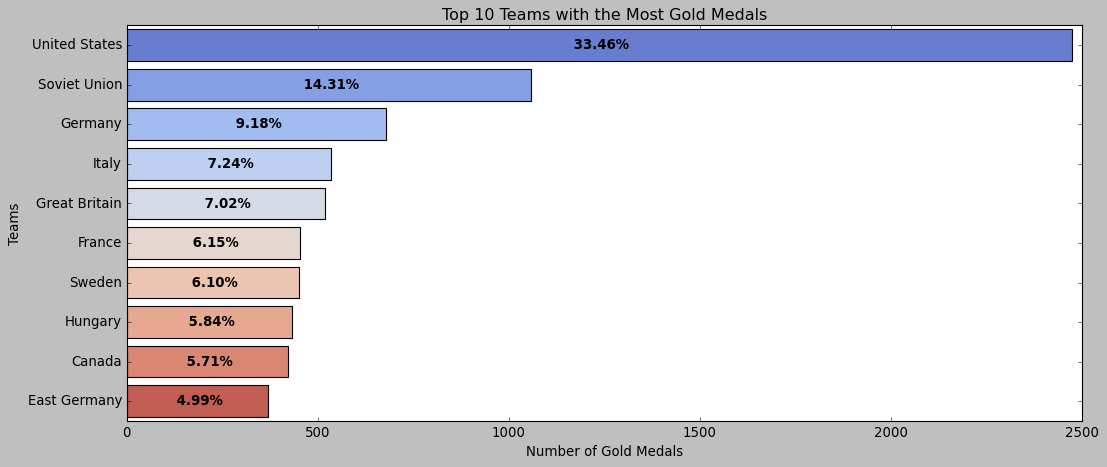

In [499]:
#Importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14, 6)) #Sets the size of the figure.
bar = sns.barplot(data = top_gold_winners,
                  x = "Medals",
                  y = "Team",
                  hue = "Team",
                  legend = False,  
                  palette = "coolwarm") #sns.barplot() creates a bar plot with x and y values along with the colour of the graph, using seaborn library.
plt.title("Top 10 Teams with the Most Gold Medals") #Sets the title of the graph.
plt.xlabel("Number of Gold Medals") #Sets the label for X axis.
plt.ylabel("Teams") #Sets the label for Y axis.
plt.tight_layout()  #Automatically adjusts the elements in the graph to make the layout more appealing.
for i in bar.patches:  #Loops over all the patches (bars) in the plot.
    percentage = (i.get_width() / total_gold) * 100  #Calculates the percentage where i.get_width() (value of the bar based on the width) is divided by the total gold medals and further multiplied by 100.
    bar.annotate(f"{percentage: .2f}%",  
                (i.get_width() / 2, i.get_y() + i.get_height() / 2),
                ha = "center", va = "center",
                color = "black", fontweight = "bold")  #Mentions the percentage value on the bars in the center (as it is commanded to reach halway through the width, and then read the bottom position of the bar, and finally go halfway through the height). Horizontal Alignment and Vertical Alignment (ha, va) aligns the text accordingly.
plt.savefig("top_10_teams_with_the_most_gold_medals.png", format="png", dpi = 300) #Exports the visualisation as an image file.
plt.show()  #Shows/displays the graph.

This graph portrays the top teams with most Gold medals over the years in Olympics.
X axis represents the number of Gold medals and Y axis represents the teams.
USA is the most successful as they have around 2500 medals, more than double the team ranked second (Soviet Union). 
The next four teams have won more than 500 medals, whereas the teams ranked from 6 to 10 have won less than 500 medals.

The reasons for such a wide gap between USA and the teams ranked after them will now be studied.
First, it may be important to check if USA has dominated over other teams (ranked between 1-9) in any sport over the years.
This will explain the wide gap between USA and the other teams.

In [502]:
#Selecting the top 10 Gold medal winning teams for further comparison.
top_countries = top_gold_winners["Team"]

In [503]:
#Creating a new dataframe with only the top Gold meadal winning teams.
df_2 = df_merge[df_merge["Team"].isin(top_countries)]
df_2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Age_group,Name_and_sport,Century
10,6,Per Knut Aaland,M,31,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None,USA,NaN,25-35,"Per Knut Aaland, Cross Country Skiing",20
11,6,Per Knut Aaland,M,31,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,None,USA,NaN,25-35,"Per Knut Aaland, Cross Country Skiing",20
12,6,Per Knut Aaland,M,31,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,None,USA,NaN,25-35,"Per Knut Aaland, Cross Country Skiing",20
13,6,Per Knut Aaland,M,31,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,None,USA,NaN,25-35,"Per Knut Aaland, Cross Country Skiing",20
14,6,Per Knut Aaland,M,33,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,None,USA,NaN,25-35,"Per Knut Aaland, Cross Country Skiing",20


In [504]:
#df_2[df_2["Medal"] == "Gold"] specifies to only consider "Gold" values under the "Medal" column.
#This dataframe is then grouped by "Sport" and "Team" to count the gold medals based on the grouped columns.
#"Medal" column is renamed (by using .rename()) to "Medal_count" for clarification.
only_gold = df_2[df_2["Medal"] == "Gold"]
medals_count = only_gold.groupby(["Sport", "Team"])["Medal"].count().reset_index()
medals_count.rename(columns = {"Medal": "Medal_count"}, inplace = True)

In [505]:
#Locating the teams that have won the most gold medals in each sport.
top_teams = medals_count.loc[medals_count.groupby("Sport")["Medal_count"].idxmax()]
top_teams.head()

,Sport,Team,Medal_count
5,Alpine Skiing,United States,16
7,Alpinism,Great Britain,12
12,Archery,United States,14
14,Art Competitions,Germany,9
29,Athletics,United States,537


In [506]:
#Taking the total number of Gold medals won by all the teams combined (from the first dataframe), and not only the top Gold medal winning teams.
#"Medal" column is then renamed into "Total_medals" for clarification.
total_medals = df_merge[df_merge["Medal"] == "Gold"].groupby("Sport")["Medal"].count().reset_index()
total_medals.rename(columns = {"Medal": "Total_medals"}, inplace = True)

In [507]:
#Merging total_medals with medals_count in order to get the "Total_medals" column in the medals_count dataframe.
#"Medal_count" and "Total_medals" columns are then used to calculate the percentage of medals (Gold) won by teams in each sport.
#The resulted Percentage value is then rounded to 2 numbers after the decimal.
medals_count = medals_count.merge(total_medals, on = "Sport")
medals_count["Percentage"] = (medals_count["Medal_count"] / medals_count["Total_medals"]) * 100
medals_count["Percentage"] = medals_count["Percentage"].round(2)
medals_count

,Sport,Team,Medal_count,Total_medals,Percentage
0,Alpine Skiing,Canada,4,143,2.80
1,Alpine Skiing,France,15,143,10.49
2,Alpine Skiing,Germany,14,143,9.79
3,Alpine Skiing,Italy,13,143,9.09
4,Alpine Skiing,Sweden,5,143,3.50
...,...,...,...,...,...
274,Wrestling,Hungary,19,413,4.60
275,Wrestling,Italy,7,413,1.69
276,Wrestling,Soviet Union,62,413,15.01
277,Wrestling,Sweden,28,413,6.78


In [508]:
#Finally, the dominating teams (if any) are calculated for a sport.
#This can be found by checking if those teams have won more than 50% of the total Gold medals.
dominance = medals_count[medals_count["Percentage"] > 50]
dominance

,Sport,Team,Medal_count,Total_medals,Percentage
32,Basketball,United States,281,365,76.99
59,Croquet,France,4,4,100.00
145,Jeu De Paume,United States,1,1,100.00
172,Roque,United States,1,1,100.00
181,Rugby,United States,35,67,52.24
214,Softball,United States,45,60,75.00
231,Swimming,United States,645,1099,58.69


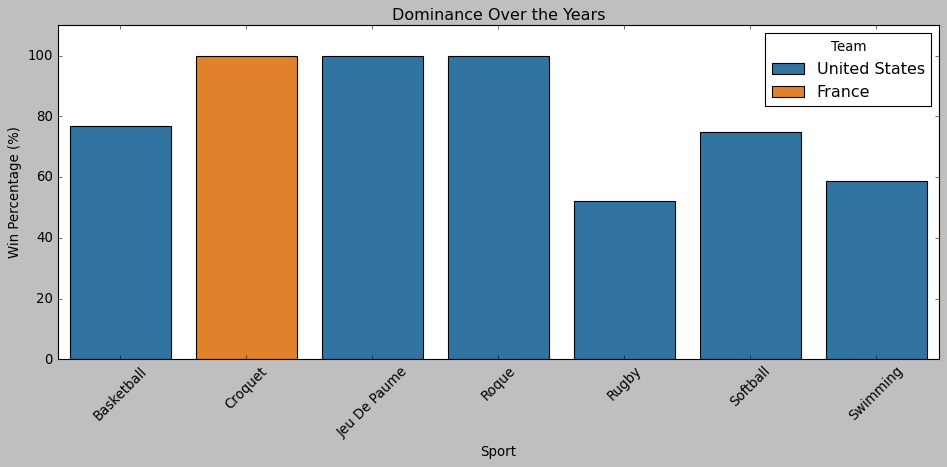

In [509]:
plt.figure(figsize = (12, 6))  #Sets the size of the figure.
bar_plot = sns.barplot(data = dominance,
                       x = "Sport",
                       y = "Percentage",
                       hue = "Team",
                       palette = "tab10") #sns.barplot() creates a bar plot with x and y values along with the colour of the graph, using seaborn library.  
plt.xticks(rotation = 45)  #Rotates the values of X axis by 60 degrees.
plt.title("Dominance Over the Years")  #Sets the title of the plot.
plt.xlabel("Sport")  #Sets the label for X axis.
plt.ylabel("Win Percentage (%)")  #Sets the label for Y axis.
max_y = dominance["Percentage"].max()  #Finds the maximum percentage value.
plt.ylim(0, max_y + 10)  #Adds 10% space above the highest value.
plt.tight_layout()  #Automatically adjusts the elements in the graph to make the layout more appealing.
plt.savefig("Dominance Over the Years.png", format="png", dpi = 300) #Exports the visualisation as an image file.
plt.show()

This seaborn bar plot proves that USA has dominated in 6 sports and the only other team to dominate a sport is France.
This is one of the reasons for USA to have a big margin in winning Gold medals throught the years.

Furhter comparison can be done by taking top 3 teams into account in order to study the high margin of Gold medals won by USA.
This can also clarify why the teams ranked 2 and 3 are far behind USA.

In [512]:
#df_merge[df_merge["Medal"] == "Gold"] specifies to only consider "Gold" values under the "Medal" column.
#.groupby("Team")["Medal"].count().sort_values(ascending = False).reset_index()  groups data by "Team" and gives the sum of medals in descending order and resets the index.
#.head(3)["Team"].tolist() lists the top 3 teams with most medals (Gold). 
medals_won = df_merge[df_merge["Medal"] == "Gold"] 
most_medals = medals_won.groupby("Team")["Medal"].count().sort_values(ascending = False).reset_index()
top_3_countries = most_medals.head(3)["Team"].tolist()   
top_3_countries

['United States', 'Soviet Union', 'Germany']

In [513]:
#df_3 = df_merge[df_merge["Team"].isin(top_3_countries)] creates a new dataframe where "Team" values are in "top_3_countries" mentioned above.
df_3 = df_merge[df_merge["Team"].isin(top_3_countries)]

In [514]:
#Checking if the above code has worked. ["Team"].unique() gives the unique "Team" values.
df_3["Team"].unique()

array(['United States', 'Soviet Union', 'Germany'], dtype=object)

<Figure size 1600x1200 with 0 Axes>

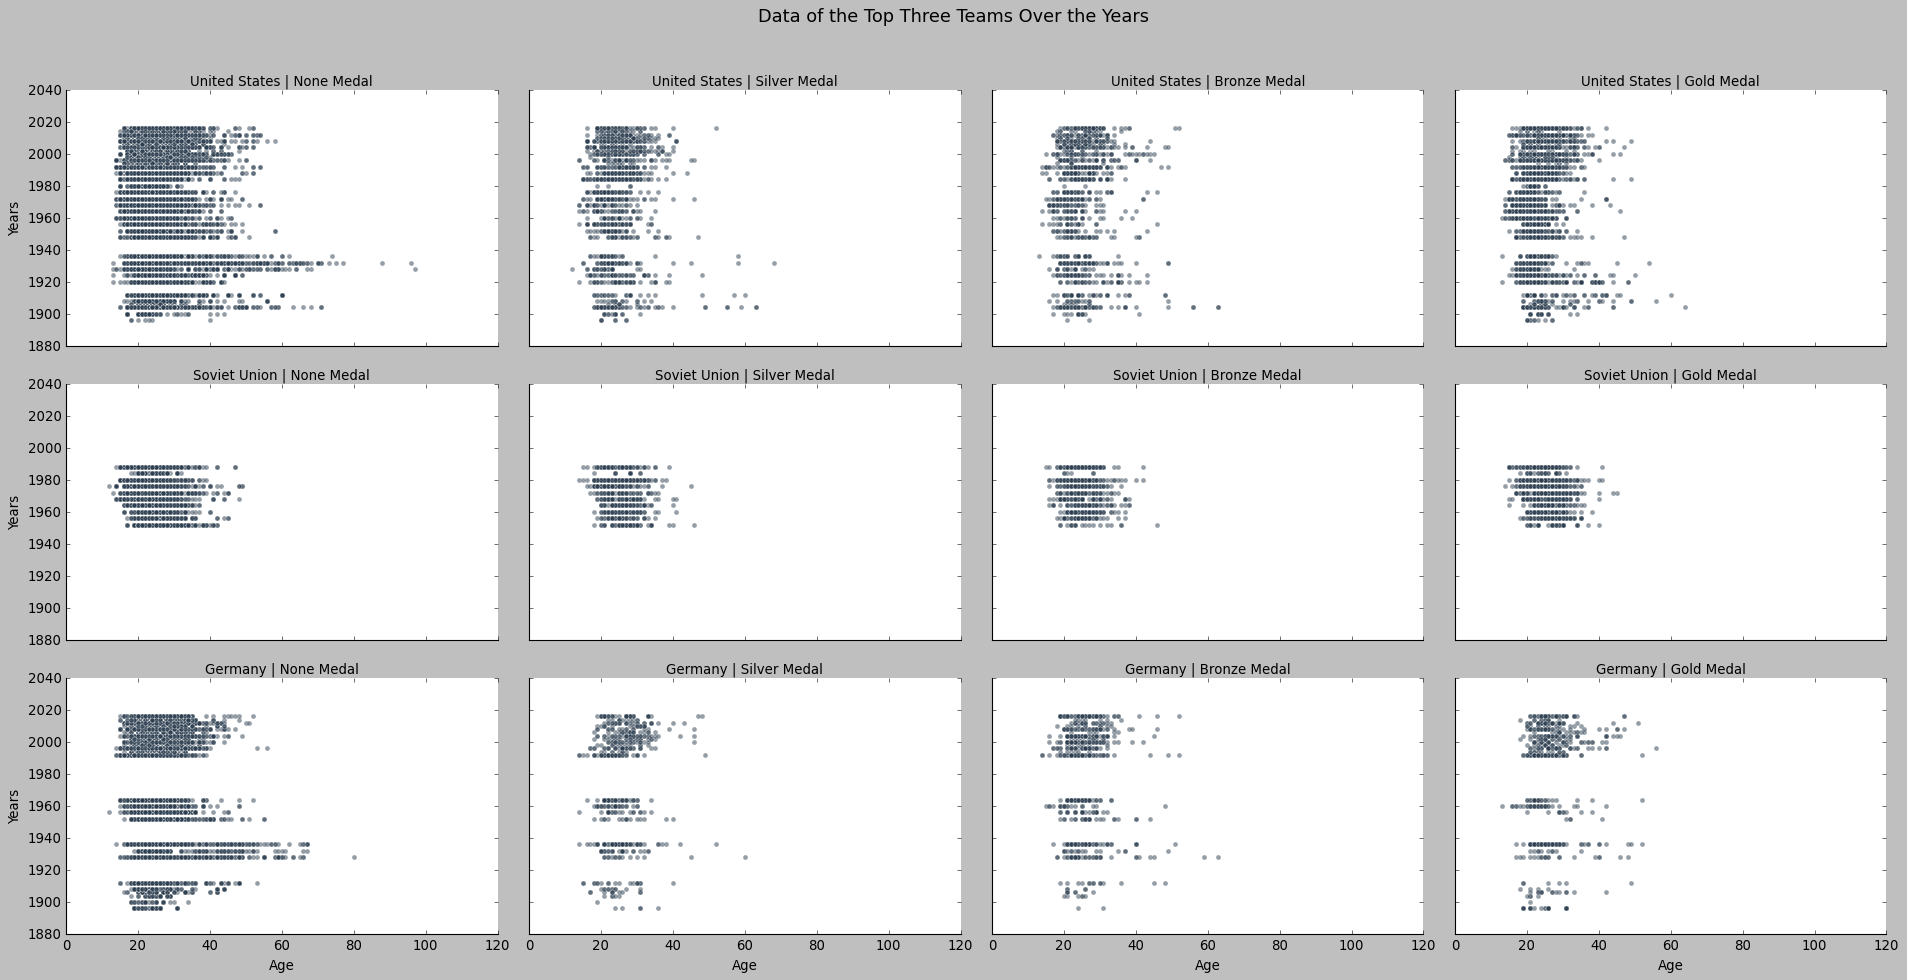

In [515]:
sns.set_style("whitegrid")   #Sets the grid style under seaborn.
plt.style.use("classic")     #Sets the visual style under matplotlib.
fig = plt.figure(figsize = (20,15))  #Sets the size of the figure.
g = sns.FacetGrid(data = df_3,  
                  col = "Medal",
                  row = "Team",
                  height = 4,
                  aspect = 1.5)  #Creates a grid of subplots where column is based on "Medal" values and row is based on "Team" values along with the size (height and aspect) mentioned.
g.map_dataframe(sns.scatterplot,
                x = "Age",
                y = "Year",
                alpha = 0.5,
                color = "#2c3e50")  #Creates scatter plots with x values, y values, alpha(transparency level) and color as mentioned.
g.set_axis_labels("Age", "Years")   #Sets the axes labels.
g.set_titles(col_template = "{col_name} Medal",
             row_template = "{row_name}")  #Modifies the titles of each subplot.
g.fig.suptitle("Data of the Top Three Teams Over the Years",  
               y = 1.02,
               fontsize = 16)  #Sets the title for the entire graph along with its placement and font size.
plt.savefig("data_of_the_top_three_teams_over_the_years.png", format = "png", dpi = 300) #Exports the visualisation as an image file.
plt.tight_layout() #Adjusts the placing between subplots automatically. 

This small multiples graph has been created to compare the factors of the 3 countries with most medals won in the Olympics.
This is another way to interpret how USA managed to gain such a huge lead in winning Gold medals.
X axis represents age whereas Y axis represents the years. The columns are based on medals while the rows are based on the teams/countries.
Age is taken into account to get the idea of the age trends among these countries.
It can also be used to get a brief idea of the number of participants (by looking at the density of the plots).
This is also the reason for including all the medals (including "None") in order to know the overall participation of the teams over the years.
Due to the World Wars, the 1916, 1940 and 1944 Olympics were cancelled. Hence there is a gap seen in the graph of every country during this period. 

Comparison between the teams:-
USA has the maximum number of participants with a wide range of age, followed by Germany and Soviet Union.
This can be seen as USA's graph is more populated as compared to the other two teams.
Soviet Union only shows data from 1952 to 1988 as their first appearance was in 1952 whereas the last one was in 1988 after which the dissolution of Soviet Union took place.
This limited availability of data under the Soviet Union is one of the reasons of the wide gap with USA.
Germany has a wider gap in data between 1960s and 1980s as they were participating as two separate teams (East Germany and West Germany) at the time.
As the medals won by East Germany and West Germany are not shown under Germany as a whole, the gap widens for Germany with the USA and the Soviet Union.
These can be the reasons for USA to have a good lead but there are other valid reasons like:- 
1. Supporting athletes at a very high level at clubs.
2. Investing in sports infrastructure that help athletes train in the best possible way.

## Data export

In [519]:
#Saving the cleaned and wrangled DataFrames to a new CSV file.
df_merge.to_csv("df_merge_cleaned.csv", index = False)
df_2.to_csv("df_2_cleaned.csv", index = False)
df_3.to_csv("df_3_cleaned.csv", index = False)

## Conclusion

This project gives the opportunity to gather valuable information about the Olympics dataset. In the beginning, it was quite challenging to gather information on what columns to group together to calculate the mean of age, weight, and height to fill their missing values, but after some research, everything was clear. Another issue was converting year into datetime format. The datetime format includes the day and month as well. However, it was not accurate and so a lot of different methods were used to remove the day and month but everything would convert the year column into integer type again. So, the year column was converted into datetime first and then converted into integer by providing an explanation of doing so. The last issue to overcome was during the making of the seaborn bar plot. Since the maximum value of Y axis (Percentage) was 100, there was no space between the highest value of the bar and the top of the bar. So, an extra code (plt.ylim()) was used to solve this issue by adding 10% of extra space in between the top of the graph and the highest value. 

Future Improvements: In future projects, it would be better to diot deeper into the data, by gaining more external knowledge and content. An example here could be to analyse data of the Soviet Union as individual countries (after dissolution) or Germany as East Germany and West Germany (from the 1960s to 1980s) and then create a small multiples plot instead of using the Soviet Union and Germany as a whole whicledad to data gaps in the plot that needed to be explained.  

A lot of aspects such as problem solving and the importance of research for solving certain issues were covered through this project. Also, all the objectives of this project were achieved as it was found that the USA is leading by a huge margin when it comes to most gold medals won, and also the domination of USA on various sports (which helped them gain this lead). Lastly, the high participation and other aspects that got them the first rank were seen. 

Recommendations: For countries ranked after the USA, it would be better if they try to increase their participation and also send more athletes to the Olympics. This would require an increase in investment to be made on sports to support existing athletes and develop new ones. USA focuses on all these aspects and so is leading in the Olympics medal tally.


## Reference List / (Annotated) Bibliography

1.	Alex The Analyst (2023) Data Cleaning in Pandas | Python Pandas Tutorials. 23 May. Available at: https://youtu.be/bDhvCp3_lYw?si=VoSrCUrEzzb6yOEO (Accessed: 22 December 2024). Relevance of this source: Introduced various methods of data cleaning.
2.	Atiković, A., Kalinski, S.D. and Čuk, I., 2017. Age trends in artistic gymnastic across World Championships and the Olympic Games from 2003 to 2016. Science of gymnastics journal, 9(3), pp.251-263. Relevance of this source: Assisted in grouping columns while filling missing age values by calculating the average age.
3.	Condon, E.M., Golden, B.L. and Wasil, E.A., 1999. Predicting the success of nations at the Summer Olympics using neural networks. Computers & Operations Research, 26(13), pp.1243-1265. Relevance of this source: Used to justify a statement in the literature review.
4.	Data, M.C., Komorowski, M., Marshall, D.C., Salciccioli, J.D. and Crutain, Y., 2016. Exploratory data analysis. Secondary analysis of electronic health records, pp.185-203. Relevance of this source: Used to justify a statement in the literature review.
5.	Dyreson. Olympic Legacies and the United States. Available at: https://www.ioa.org.gr/post/olympic-legacies-and-the-united-states#:~:text=If%20the%20United%20States%20has,rehabilitated%20for%20the%201984%20Olympics. (Accessed: 22 December 2024). Relevance of this source: Assisted in justifying one of the two additional reasons of USA's success in the small multiples visualisation.
6.	Johnson, D.K. and Ali, A., 2004. A tale of two seasons: participation and medal counts at the Summer and Winter Olympic Games. Social science quarterly, 85(4), pp.974-993. Relevance of this source: Assisted in grouping columns while filling missing weight values by calculating the average weight.
7.	Khosla, T., 1968. Unfairness of certain events in the Olympic Games. Br Med J, 4(5623), pp.111-113. Relevance of this source: Assisted in grouping columns while filling missing weight values by calculating the average weight.  
8.	Narute, V., n.d. Analyzing Evolution of the Olympics by Exploratory Data Analysis. Relevance of this source: Used to justify a statement in the literature review.
9.	O’Neill, K.S., Cotton, W.G., Cuadros, J.P. and O’Connor, D., 2016. An investigation of the relative age effect amongst Olympic athletes. Talent Development & Excellence, 8(1), pp.27-39. Relevance of this source: Assisted in grouping columns while filling missing age values by calculating the average age.
10.	O’Sullivan (2024) What Makes A Successful Olympic Nation? Available at: https://www.forbes.com/sites/mikeosullivan/2024/08/10/what-makes-a-successful-olympic-nation/#:~:text=One%20element%20they%20have%20in,of%20'how%20to%20win’. (Accessed: 22 December 2024). Relevance of this source: Assisted in justifying one of the two additional reasons of USA's success in the small multiples visualisation.
11.	Pradhan, R., Agrawal, K. and Nag, A., 2021, March. Analyzing evolution of the olympics by exploratory data analysis using r. In IOP Conference Series: Materials Science and Engineering (Vol. 1099, No. 1, p. 012058). IOP Publishing. Relevance of this source: Used to justify a statement in the literature review.
12.	Sagala, N.T. and Aryatama, F.Y., 2022. Exploratory Data Analysis (EDA): a study of Olympic medallist. Sistemasi: Jurnal Sistem Informasi, 11(3), pp.578-587. Relevance of this source: Used to justify a statement in the literature review.
13.	Sands, W.A., Murray, S.R., McNeal, J.R., Slater, C. and Stone, M.H., 2018. HISTORICAL CHANGES IN HEIGHT, MASS AND AGE OF USA WOMEN'S OLYMPIC GYMNASTICS TEAM: AN UPDATE. Science of Gymnastics Journal, 10(3), pp.391-399. Relevance of this source: Assisted in grouping columns while filling missing height values by calculating the average height.  
14.	Sergeyev, Y.D., 2015. The Olympic medals ranks, lexicographic ordering and numerical infinities. arXiv preprint arXiv:1509.04313. Relevance of this source: Used to justify a statement in the introduction.
15.	The Tech Express (2024) Python Seaborn Data Visualisation – BAR PLOT WITH ANNOTATION. 10 February. Available at: https://youtu.be/TbhPF1_gZ1E?si=8VYANXfCZ0gjHrao (Accessed: 22 December 2024). Relevance of this source: Assisted and provided knowledge about bar plot annotations.
